<a href="https://colab.research.google.com/github/Faabry/Data_Analysis/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de diabetes**
* # Uma empresa precisa fazer um levantamento sobre quantas pessoas tem mais de 50 anos e dentre essas pessoas quantas tem o BMI abaixo de 30 **"Normal"** e quantas pessoas tem o BMI acima de 30 **"Obeso"**.

## **Task 1:** Importar a base de dados.

In [48]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Task 2:** Verificar o tipo primitivo de cada coluna.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
df.shape

# Nosso DataFrame original possui 
# 768 Linhas
# 9 Colunas

(768, 9)

## **Task 3:** Filtrar as colunas onde os pacientes tem mais de 50 anos.

In [51]:
maior_que_cinquenta = df.loc[df["Age"] > 50]
maior_que_cinquenta.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


In [52]:
maior_que_cinquenta.shape

# Nosso DataFrame com pessoas acima de 50 anos tem:
# 81 Linhas
# 9 Colunas

(81, 9)

## **Task 4:** Criar uma nova coluna com a informação se aquele paciente esta com o BMI **Normal** ou **Obeso**.

In [53]:
status = []

In [54]:
for row in maior_que_cinquenta["BMI"]:
  if row < 30:
    status.append("Normal")
  else:
    status.append("Obeso")

In [55]:
len(status)

81

In [56]:
maior_que_cinquenta["Status"] = status

<ipython-input-56-1c1421a8fdab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maior_que_cinquenta["Status"] = status


In [57]:
maior_que_cinquenta.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status
8,2,197,70,45,543,30.5,0.158,53,1,Obeso
9,8,125,96,0,0,0.0,0.232,54,1,Normal
12,10,139,80,0,0,27.1,1.441,57,0,Normal
13,1,189,60,23,846,30.1,0.398,59,1,Obeso
14,5,166,72,19,175,25.8,0.587,51,1,Normal


In [58]:
x = maior_que_cinquenta.loc[maior_que_cinquenta["Status"] == "Normal"].count()
y = maior_que_cinquenta.loc[maior_que_cinquenta["Status"] == "Obeso"].count()

In [59]:
a = [x["Status"], y["Status"]]
a

[38, 43]

In [60]:
labels = ["Normal", "Obeso"]

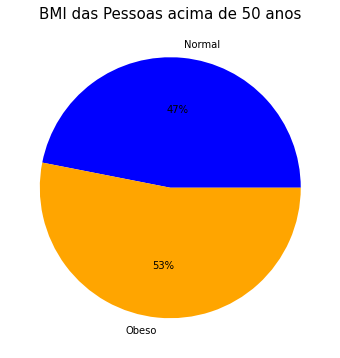

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("BMI das Pessoas acima de 50 anos", size=(15))
plt.pie(a, labels=labels, autopct="%0.0f%%", colors=("blue", "orange"))
plt.show()

# **Conclusão:**
* 47% das pessoas acima de 50 anos tem o BMI abaixo de 30 sendo classificadas como "Normal".
* 53% das pessoas acima de 50 anos tem o BMI acima de 30 sendo classificadas como "Obeso".

# **Realizando o mesmo procedimento usando "SQL"**

In [ ]:
# pip install ipython-sql

# Capturando o dataframe através do pandas (python)

In [34]:
import sqlite3

In [81]:
table = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
table.to_excel("dados_diabetes.xlsx")

In [82]:
dataframe = pd.read_excel("dados_diabetes.xlsx")
dataframe.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


através do SQL

## *Criando o Banco de Dados*

In [83]:
cnn = sqlite3.connect("diabetes.db")

# *Convertendo o DataFrame em um arquivo SQL*

In [84]:
dataframe.to_sql('dados_diabetes', cnn)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [85]:
%reload_ext sql


In [86]:
%sql sqlite:///diabetes.db

'Connected: @diabetes.db'

In [87]:
%%sql

SELECT * FROM dados_diabetes

 * sqlite:///diabetes.db
   sqlite:///teste_bd.db
Done.


index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status
8,2,197,70,45,543,30.5,0.158,53,1,Obeso
9,8,125,96,0,0,0.0,0.232,54,1,Normal
12,10,139,80,0,0,27.1,1.441,57,0,Normal
13,1,189,60,23,846,30.1,0.398,59,1,Obeso
14,5,166,72,19,175,25.8,0.587,51,1,Normal
24,11,143,94,33,146,36.6,0.254,51,1,Obeso
28,13,145,82,19,110,22.2,0.245,57,0,Normal
30,5,109,75,26,0,36.0,0.546,60,0,Obeso
39,4,111,72,47,207,37.1,1.39,56,1,Obeso
43,9,171,110,24,240,45.4,0.721,54,1,Obeso


In [93]:
%%sql

ALTER TABLE dados_diabetes
DROP Status;

 * sqlite:///diabetes.db
   sqlite:///teste_bd.db
(sqlite3.OperationalError) near "DROP": syntax error
[SQL: ALTER TABLE dados_diabetes
DROP Status;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [95]:
%%sql 

SELECT * FROM dados_diabetes
WHERE BMI < 30

 * sqlite:///diabetes.db
   sqlite:///teste_bd.db
Done.


index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status
9,8,125,96,0,0,0.0,0.232,54,1,Normal
12,10,139,80,0,0,27.1,1.441,57,0,Normal
14,5,166,72,19,175,25.8,0.587,51,1,Normal
28,13,145,82,19,110,22.2,0.245,57,0,Normal
93,4,134,72,0,0,23.8,0.277,60,1,Normal
123,5,132,80,0,0,26.8,0.186,69,0,Normal
129,0,105,84,0,0,27.9,0.741,62,1,Normal
140,3,128,78,0,0,21.1,0.268,55,0,Normal
223,7,142,60,33,190,28.8,0.687,61,0,Normal
278,5,114,74,0,0,24.9,0.744,57,0,Normal


In [96]:
%%sql 

SELECT * FROM dados_diabetes
WHERE Status = "Obeso"

 * sqlite:///diabetes.db
   sqlite:///teste_bd.db
Done.


index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status
8,2,197,70,45,543,30.5,0.158,53,1,Obeso
13,1,189,60,23,846,30.1,0.398,59,1,Obeso
24,11,143,94,33,146,36.6,0.254,51,1,Obeso
30,5,109,75,26,0,36.0,0.546,60,0,Obeso
39,4,111,72,47,207,37.1,1.39,56,1,Obeso
43,9,171,110,24,240,45.4,0.721,54,1,Obeso
53,8,176,90,34,300,33.7,0.467,58,1,Obeso
67,2,109,92,0,0,42.7,0.845,54,0,Obeso
115,4,146,92,0,0,31.2,0.539,61,1,Obeso
148,5,147,78,0,0,33.7,0.218,65,0,Obeso


In [97]:
%%sql

SELECT COUNT (*) FROM dados_diabetes
WHERE BMI < 30

 * sqlite:///diabetes.db
   sqlite:///teste_bd.db
Done.


COUNT (*)
38


In [98]:
%%sql

SELECT COUNT (*) FROM dados_diabetes
WHERE BMI > 30 OR Status = "Obeso"

 * sqlite:///diabetes.db
   sqlite:///teste_bd.db
Done.


COUNT (*)
43
